# Plot-Based Book Recommendation System

**Ever finished a book and desperately wished you could find another just like it? The one with the twists that kept you guessing, the moments that made you laugh out loud, or the characters that stole your heart? We all have!**

This project intends to help ardent readers by throwing away the boring recommendations and diving deeper! It's a system that analyses the heart of a story – the plot, the characters, the emotions – to find books that echo the elements you love. Think of it like a literary matchmaker, connecting you with your next great read. So, ditch the "been-there-done-that" suggestions and discover hidden gems that resonate with the stories that hold a special place on your bookshelf!!

## Step 1 - Data Importing and cleaning

In [5]:
#Import the essential libraries

import numpy as np
import pandas as pd


#Import the dataset

np.random.seed(5)
books_df = pd.read_csv('BooksDataset.csv', sep=",")


#Clean the dataset and remove blank columns

books_df = books_df.drop(columns='Publisher')
books_df = books_df.dropna(subset=['Description'])
print("Number of books loaded: %s " % (len(books_df)))


#Check the dataframe created
books_df.head()

Number of books loaded: 70213 


,Title,Authors,Description,Category
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General"
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General"
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets"
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science"
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General"


## Step 2 - Combine the Authors, Description and Category into a single "Plot" column

In [6]:
#Create a new column combining Authors, Description and Category

books_df["plot"] = books_df[['Authors', 'Description', 'Category']].astype(str).agg(' '.join, axis=1).fillna('')


#Drop the existing columns

books_df = books_df.drop(columns=['Authors', 'Description', 'Category'])


#Check the updated DataFrame
books_df.head()

,Title,plot
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T. Collects poems writt..."
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and..."
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard A humor classic, this tongue..."
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro..."
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J. ""The Bible and the social a..."


## Step 3 - Data Preprocessing

- Tokenisation 
    **(Convert the plot column into tokens)** 
    
- Remove Stopwords and Non-Alphabetic Characters

- Lemmatization 
    **(Apply stemming, convert the tokens into only meaningful tokens)**

In [7]:
#Import required Libraries

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


#Download punkt (for Tokenisation), stopwords, and wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


#Define the function for pre-processing of data

def preprocess_text(text):
    # Tokenize into words
    tokens = nltk.word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    # Remove non-alphabetic characters 
    tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    #Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = ' '.join(tokens)
    # Wrap each token in double quotes
    tokens= [f'"{token}"' for token in tokens]
    return processed_text


#Create a new column consisting the tokens of plot

books_df['tokens'] = books_df['plot'].apply(preprocess_text)


#Check the updated DataFrame
books_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


,Title,plot,tokens
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T. Collects poems writt...",stepanek mattie j. t. collect poem written ele...
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",aksyonov vassily heim michael henry bouis anto...
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard A humor classic, this tongue...",smith richard humor classic tongue-in-cheek di...
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...",miller judith engelberg stephen broad william ...
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J. ""The Bible and the social a...",gomes peter j bible social moral consequence d...


## Step 4 - Feature Selection

**TFIDF - Term Frequency - Inverse Document Frequency**
(Capture the importance of a word based on its frequency in the document and rarity across the corpus)


*Create a Vectorizer to create a matrix that stores the tokens after tfidf application*

In [8]:
#Import the vectorizer from scikitLearn library

from sklearn.feature_extraction.text import TfidfVectorizer


# Create TF-IDF vectorizer and the matrix

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(books_df['tokens'])


#Check the size of the matrix
print(tfidf_matrix.shape)

(70213, 120340)


## Step 5 - Choose your method of extracting data

**1. KMeans Clustering**
- If you have user-book interaction data (ratings, purchases, etc.), you could use K-means to cluster users based on their preferences.
- Then, for a new user, recommend books popular among users in the same cluster.

In [9]:
#Import KMeans

from sklearn.cluster import KMeans


#Create 5 clusters and apply them in the tfidf matrix created earlier

km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)


#Add a column for these clusters

clusters = km.labels_.tolist()
books_df["cluster"] = clusters


#Check the number of books in each cluster
books_df['cluster'].value_counts() 

cluster
1    27709
0    23989
4     8678
3     6743
2     3094
Name: count, dtype: int64

**2. Cosine Similarity**
- Find similar books based on user query
- Check the similarity between two vectors

In [11]:
#Import cosine similarity

from sklearn.metrics.pairwise import cosine_similarity


#Find similar books based on a user query

user_query = input("Enter the prompt: ")
if user_query in books_df['Title']:
    query = df[df['Title'] == user_query]['plot'].values
else:
    query = user_query


#Preprocess the query
user_query_processed = preprocess_text(query)
user_query_vector = vectorizer.transform([user_query_processed])


# Calculate cosine similarity between user query and all books
cosine_similarities = cosine_similarity(user_query_vector, tfidf_matrix)


# Find the top 5 most similar books (based on cosine similarity)
top_5_indices = cosine_similarities.argsort()[0][-5:] 
print("Recommended Books:")
for idx in top_5_indices:
    print(books_df.iloc[idx]['Title']) 

Enter the prompt:  a thrilling mystery novel with a detective investigating a murder.


Recommended Books:
Bird In A Cage
Mystery
Poison: An 87th Precinct Novel
Ghosts
Police Procedurals (Academy Mystery Novellas)


**3. Nearest Neighbours**
- It identifies the nearest neighbours (most similar books) based on the TF-IDF vector of the user's query.
- It doesn't require specifying the number of clusters upfront (unlike K-means)

In [13]:
#Import Nearest Neighbours

from sklearn.neighbors import NearestNeighbors


#Find nearest 5 neighbours based on the tfidf matrix

knn = NearestNeighbors(n_neighbors=5)
knn.fit(tfidf_matrix)

distances, indices = knn.kneighbors(user_query_vector.reshape(1, -1))

recommended_books = [books_df.iloc[idx]['Title'] for idx in indices.flatten()]


#Print the Books

print("Recommended Books:")
for book_title in recommended_books:
  print(book_title)


Recommended Books:
What Bird Did That?: A Driver's Guide to Some Common Birds of North America
The Pleasures of Watching Birds
Simon & Schuster's Guide to Pet Birds
An Illustrated Guide to Attracting Birds
Bird Watching For Dummies


## Step 6 - Visualise the most frequent words!

In [16]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 751.6 kB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


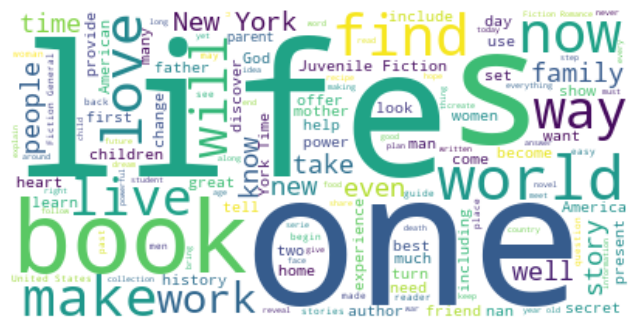

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

def plot_wordcloud(text):
  wordcloud = WordCloud(background_color="white", max_words=200)
  wordcloud.generate(text)
  plt.figure(figsize=(8, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Combine all book plot into a single string
all_text = ' '.join(books_df['plot'])

plot_wordcloud(all_text)